# K-Nearest Neighbours/ Random Forest Classifier

Goal
- It is your job to predict if a passenger survived the sinking of the Titanic or not.
- For each in the test set, you must predict a 0 or 1 value for the variable.



survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex	

Age	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


In [427]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline


In [428]:
df = pd.DataFrame()

df = pd.read_csv('data/titanic_train.csv')

print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [429]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [430]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [431]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [432]:
print('Any Missing values:{}'.format(df.isnull().values.any()))

print('\nMissing values by columns:\n{}'.format(df.isnull().sum()))

print('\nTotal sum of missing values: {}'.format(df.isnull().sum().sum()))

Any Missing values:True

Missing values by columns:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Total sum of missing values: 866


<AxesSubplot:>

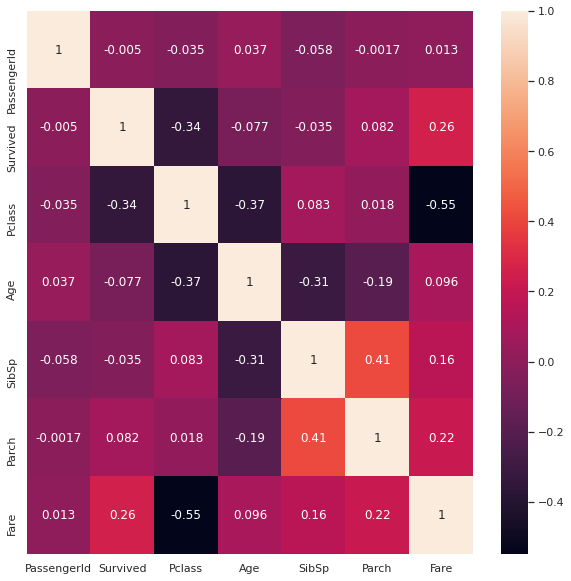

In [330]:
import seaborn as sns
sns.set()

plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [433]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [434]:
df.groupby(['Pclass','Sex','Survived'])['Age'].median()

Pclass  Sex     Survived
1       female  0           25.0
                1           35.0
        male    0           45.5
                1           36.0
2       female  0           32.5
                1           28.0
        male    0           30.5
                1            3.0
3       female  0           22.0
                1           19.0
        male    0           25.0
                1           25.0
Name: Age, dtype: float64

In [435]:
#Filling the missing values with mean of Pclass and Sex.
df["Age"].fillna(df.groupby(['Pclass','Sex'])['Age'].transform("mean"), inplace=True)
print('\nMissing values by columns:\n{}'.format(df.isnull().sum()))


Missing values by columns:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [548]:
df['FamilySize'] = df['SibSp'] + df['Parch']+1

df['Title'] = df.Name.str.extract('([A-Za-z]+)\.', expand = False)

df.Title.value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Lady          1
Mme           1
Countess      1
Don           1
Capt          1
Jonkheer      1
Ms            1
Sir           1
Name: Title, dtype: int64

In [549]:
least_occuring = ['Rev','Dr','Major', 'Col', 'Capt','Jonkheer','Countess']

df.Title = df.Title.replace(['Ms', 'Mlle','Mme','Lady'], 'Miss')
df.Title = df.Title.replace(['Countess','Dona'], 'Mrs')
df.Title = df.Title.replace(['Don','Sir'], 'Mr')
df.Title = df.Title.replace(least_occuring,'Rare')

In [551]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


In [552]:
df_train = df[['Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare', 'Embarked', 'Sex','FamilySize', 'Title']]

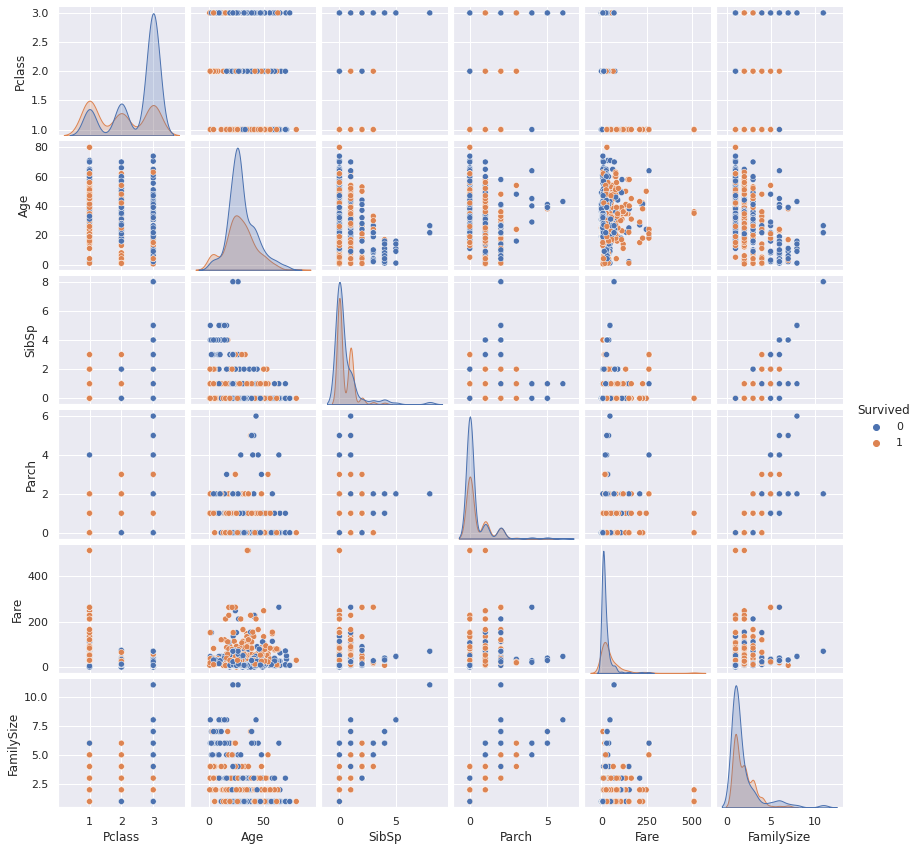

In [553]:
sns.pairplot(df_train, hue='Survived', height=2)

In [353]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# 'SibSp','Parch'

# X_train = df_train[['Pclass', 'Fare']].values

# "Age", "SibSp", "Parch", "Fare"

X_train = df_train[['Pclass', 'Fare', 'SibSp', 'Parch']].values

y_train = df_train['Survived'].values

# Feature Scaling (dont scale y_train)
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))

k = 20
kclassifier = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

# Predicting the Test set results
y_pred = kclassifier.predict(X_train)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, kclassifier.predict(X_train)))
print("train set Accuracy: ", metrics.accuracy_score(y_train, y_pred))

print(metrics.classification_report(y_train, kclassifier.predict(X_train)))
knn_scores = cross_val_score(kclassifier, X_train, y_train, cv=10)
print("cross_val_score: ", knn_scores.mean())


Train set Accuracy:  0.7418630751964085
train set Accuracy:  0.7418630751964085
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       549
           1       0.72      0.54      0.62       342

    accuracy                           0.74       891
   macro avg       0.73      0.70      0.71       891
weighted avg       0.74      0.74      0.73       891

cross_val_score:  0.7138701622971286


In [354]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg_scores = cross_val_score(logreg, X_train, y_train, cv=10)
logreg_scores.mean()


0.6858302122347066

In [355]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.6958177278401998

In [562]:
nan_values = df_train[df_train['Embarked'].isna()]
nan_values

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex,FamilySize,Title
61,1,1,38.0,0,0,80.0,NaN,female,1,Miss
829,1,1,62.0,0,0,80.0,NaN,female,1,Mrs


In [563]:
df_RandomForest = df_train.copy()

In [564]:
df_RandomForest.drop([61,829], inplace=True)


In [565]:
nan_values = df_RandomForest[df_RandomForest['Embarked'].isna()]
nan_values


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex,FamilySize,Title


In [566]:
print(df.shape)
print(df_RandomForest.shape)

(891, 14)
(889, 10)


In [625]:

# df[['Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']]

y = df_RandomForest["Survived"]

# features = ["Pclass", "Sex", "SibSp", "Parch"]
#features = ['Pclass', 'Sex', 'Fare', 'SibSp', 'Parch', 'Embarked','Age', 'FamilySize', 'Title']
features = ['Pclass', 'Sex', 'Fare', 'Embarked','Age', 'FamilySize', 'Title']


X = pd.get_dummies(df_RandomForest[features])
X_test = pd.get_dummies(df_RandomForest[features])

model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)

model.fit(X, y)

model_scores = cross_val_score(model, X, y, cv=10)
#model_scores.mean()

#better use with test data instead train data
result_score = model.score(X, y)

print('model_scores.mean(): {}'.format(model_scores.mean()))

print('\nresult_score: {}'.format(result_score))

#model.fit(X, y)
#predictions = model.predict(X_test)

model_scores.mean(): 0.8290474974463737

result_score: 0.8368953880764904


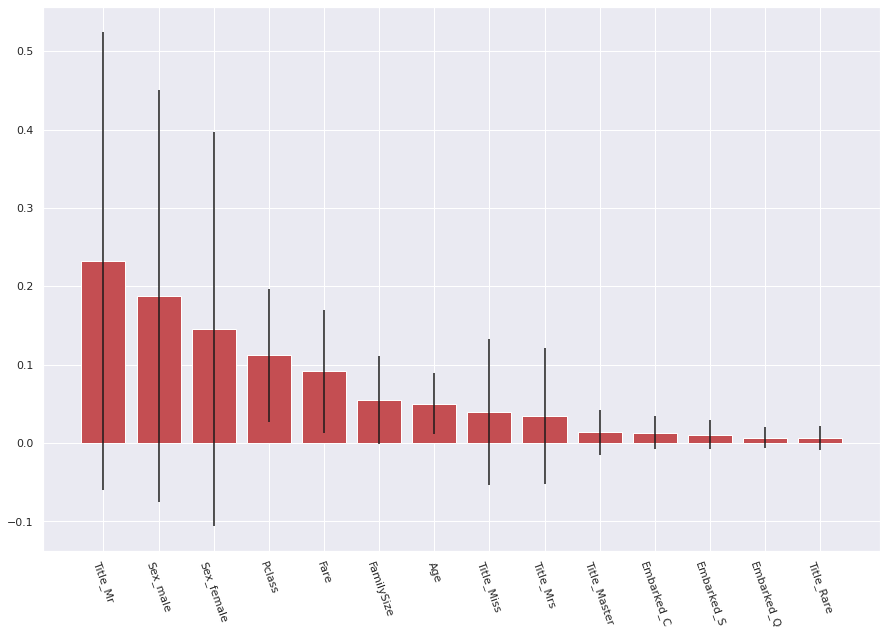

In [626]:
qtd_columns = X.columns.size

f_importances = model.feature_importances_

# Get column names
f_names = X

f_std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)

imps = [x[0] for x in zzs[:qtd_columns]]
labels = [x[1] for x in zzs[:qtd_columns]]
errs = [x[2] for x in zzs[:qtd_columns]]


plt.subplots(figsize=(15,10))
plt.bar(range(qtd_columns), imps, color="r", yerr=errs, align="center")
plt.xticks(range(qtd_columns), labels, rotation=-70);

In [294]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

#Tree = DecisionTreeClassifier(criterion="entropy")

Tree.fit(X_train, y_train)
predTree = Tree.predict(X_train)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_train, predTree))

tree_scores = cross_val_score(Tree, X_train, y_train, cv=10)
tree_scores.mean()


DecisionTrees's Accuracy:  0.7351290684624018


0.7194631710362047

In [321]:
#from  io import StringIO
import graphviz
import pydotplus
#import matplotlib.image as mpimg
from sklearn import tree
#from IPython.display import Image
%matplotlib inline 

featureNames = df_train[['Pclass','SibSp','Parch','Fare']].columns

# class_names= np.unique(y_train), 

dot_data = tree.export_graphviz(Tree, 
                                out_file=None, 
                                feature_names=featureNames, 
                                class_names= ['Yes', 'No'], 
                                filled=True, 
                                rounded=True, 
                                special_characters=True, 
                                rotate=False, 
                                max_depth=4)  

graph = graphviz.Source(dot_data)
# graph # this shows a BIG image depending of the tree size 
graph.view() # create and open a pdf file (way faster :-)

# OPTION 2: #Export image
# pydot_graph = pydotplus.graph_from_dot_data(dot_data)
# pydot_graph.write_png('original_tree.png')
# pydot_graph.set_size('"12,12!"')
# pydot_graph.write_png('resized_tree.png')

# OPTION 3: TOO SLOW  Convert and show png (hint: replace out_file=None parameter from tree.export_graphviz with the tree_titanic.dot)
# from subprocess import call
# call(['dot', '-Tpng', 'tree_titanic.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in python
# import matplotlib.pyplot as plt
# plt.figure(figsize = (20, 20))
# plt.imshow(plt.imread('tree_titanic.png'))
# plt.axis('off');
# plt.show();


'Source.gv.pdf'

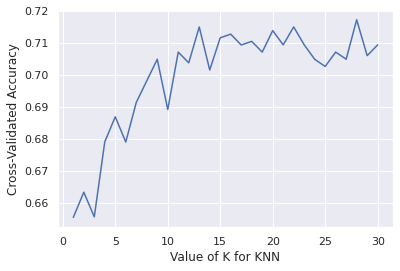

In [213]:
from sklearn.model_selection import cross_val_score

# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train,y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
#print (k_scores)

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# print( "The best accuracy was with", k_scores.max(), "with k=", k_scores.argmax()+1) 

<AxesSubplot:>

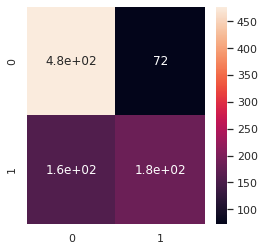

In [214]:
from sklearn.metrics import confusion_matrix
plt.subplots(figsize=(4,4))
sns.heatmap(confusion_matrix(y_train, kclassifier.predict(X_train)), annot=True)

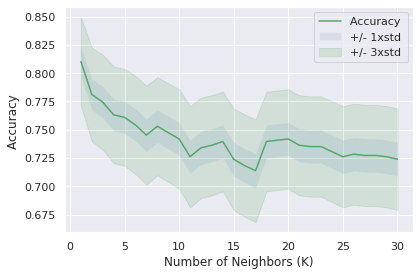

The best accuracy was with 0.8103254769921436 with k= 1


In [162]:
Ks = 31
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_train)
    mean_acc[n-1] = metrics.accuracy_score(y_train, yhat)    
    std_acc[n-1]=np.std(yhat==y_train)/np.sqrt(yhat.shape[0])

# print(mean_acc)

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [568]:
df_test = pd.DataFrame()

df_test = pd.read_csv('data/titanic_test.csv')

print(df_test.shape)

df_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [569]:
print('Any Missing values:{}'.format(df_test.isnull().values.any()))

print('\nMissing values by columns:\n{}'.format(df_test.isnull().sum()))

print('\nTotal sum of missing values: {}'.format(df_test.isnull().sum().sum()))

Any Missing values:True

Missing values by columns:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Total sum of missing values: 414


In [570]:
# Find Nan value on Fare --> ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
nan_values = df_test[df_test['Fare'].isna()]
nan_values

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [571]:
# Get the Fare mean from the 3rd ticket class passengers

result = df_test.loc[df_test['Pclass'] == 3]
print(result['Fare'].mean())

12.459677880184334


In [572]:
# Update the missing fare value

df_test.at[152,'Fare']=12.4596

In [573]:
# df_test = df_test.dropna()
nan_values = df_test[df_test['Fare'].isna()]
nan_values

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [574]:
#Filling the missing values with mean of Pclass and Sex.
df_test["Age"].fillna(df_test.groupby(['Pclass','Sex'])['Age'].transform("mean"), inplace=True)
print('\nMissing values by columns:\n{}'.format(df_test.isnull().sum()))


Missing values by columns:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [575]:
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']+1

df_test['Title'] = df_test.Name.str.extract('([A-Za-z]+)\.', expand = False)

df_test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [576]:
least_occuring = ['Rev','Dr','Col']

df_test.Title = df_test.Title.replace(['Ms'], 'Miss')
df_test.Title = df_test.Title.replace(['Dona'], 'Mrs')
df_test.Title = df_test.Title.replace(least_occuring,'Rare')

In [378]:

# 1. Execute train
X_train = df_train[['Pclass', 'Fare', 'SibSp', 'Parch']].values
y_train = df_train['Survived'].values

# Feature Scaling (dont scale y_train)
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))

k = 20  #(first submission: k = 1 score 60%)
kclassifier = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

# 2. Execute Prediction
X_test = df_test[['Pclass', 'Fare', 'SibSp', 'Parch']].values
# Feature Scaling (dont scale y_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))

# Predicting the Test set results
y_test_pred = kclassifier.predict(X_test)

print(y_test_pred.size)

print(df_test.shape)


418
(418, 11)


In [216]:

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_test_pred})
output.to_csv('fredsenav2_submission.csv', index=False)


In [387]:
# 4th attempt for 80% (RandomForestClassifier)

# 1. Execute train
# features = ['Pclass', 'Sex', 'Fare', 'SibSp', 'Parch', 'Embarked']

features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

y_RandomForest = df_RandomForest["Survived"]
X_RandomForest = pd.get_dummies(df_RandomForest[features])

model_RandomForest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
model_RandomForest.fit(X_RandomForest, y_RandomForest)

# model_scores_RandomForest = cross_val_score(model_RandomForest, X_RandomForest, y_RandomForest, cv=10)
# model_scores_RandomForest.mean()


# 2. Execute Prediction
X_test_RandomForest = pd.get_dummies(df_test[features])

y_test_RandomForest = model_RandomForest.predict(X_test_RandomForest)


output_4th = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_test_RandomForest})
output_4th.to_csv('fredsenav4_submission.csv', index=False)


In [458]:
# 5th attempt (RandomForestClassifier) included age feature

# 1. Execute train
# features = ['Pclass', 'Sex', 'Fare', 'SibSp', 'Parch', 'Embarked']

features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age']

y_RandomForest = df_RandomForest["Survived"]
X_RandomForest = pd.get_dummies(df_RandomForest[features])

model_RandomForest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
model_RandomForest.fit(X_RandomForest, y_RandomForest)

# model_scores_RandomForest = cross_val_score(model_RandomForest, X_RandomForest, y_RandomForest, cv=10)
# model_scores_RandomForest.mean()


# 2. Execute Prediction
X_test_RandomForest = pd.get_dummies(df_test[features])

y_test_RandomForest = model_RandomForest.predict(X_test_RandomForest)


output_5th = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_test_RandomForest})
output_5th.to_csv('fredsenav5_submission.csv', index=False)

In [579]:
# 10th attempt (RandomForestClassifier) included 'FamilySize', 'Title'

# 1. Execute train
features = ['Pclass', 'Sex', 'Fare', 'Embarked','Age', 'FamilySize', 'Title']

y_RandomForest = df_RandomForest["Survived"]
X_RandomForest = pd.get_dummies(df_RandomForest[features])

model_RandomForest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
model_RandomForest.fit(X_RandomForest, y_RandomForest)

# model_scores_RandomForest = cross_val_score(model_RandomForest, X_RandomForest, y_RandomForest, cv=10)
# model_scores_RandomForest.mean()


# 2. Execute Prediction
X_test_RandomForest = pd.get_dummies(df_test[features])

y_test_RandomForest = model_RandomForest.predict(X_test_RandomForest)


output_10th = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_test_RandomForest})
output_10th.to_csv('fredsenav10_submission.csv', index=False)


In [518]:
# 6th attempt (xgboostClassifier) included age feature

# from xgboost import XGBRegressor

import xgboost as xgb
from sklearn.metrics import accuracy_score

# 1. Execute train
# features = ['Pclass', 'Sex', 'Fare', 'SibSp', 'Parch', 'Embarked']

features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age']

y_XGB = df_RandomForest["Survived"]
X_XGB = pd.get_dummies(df_RandomForest[features])

train = xgb.DMatrix(X_XGB, label=y_XGB)

# 'objective': 'multi:softmax',

param = {
    'max_depth': 6,
    'eta': 0.3,    
    'objective': 'multi:softmax',
    'num_class': 2} 
epochs = 10 

model_XGB = xgb.train(param, train, epochs)
predictions_XGB = model_XGB.predict(train)

#print(accuracy_score(y_XGB, predictions_XGB))

# 2. Execute Prediction
X_test_XGB = pd.get_dummies(df_test[features])

test_XGB = xgb.DMatrix(X_test_XGB)

predictions_test_XGB = model_XGB.predict(test_XGB)

# output_6th = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions_test_XGB})
# output_6th.to_csv('fredsenav6_submission.csv', index=False)


[08:32:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
# import xgboost as xgb
# # read in data
# dtrain = xgb.DMatrix('demo/data/agaricus.txt.train')
# dtest = xgb.DMatrix('demo/data/agaricus.txt.test')
# # specify parameters via map
# param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
# num_round = 2
# bst = xgb.train(param, dtrain, num_round)
# # make prediction
# preds = bst.predict(dtest)



array([[521,  28],
       [ 80, 260]])

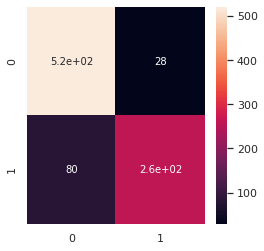

In [515]:
from sklearn.metrics import confusion_matrix
plt.subplots(figsize=(4,4))
sns.heatmap(confusion_matrix(y_RandomForest, model_XGB.predict(train)), annot=True)

confusion_matrix(y_RandomForest, predictions_XGB)

In [547]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age']

X_test_XGB = pd.get_dummies(df_test[features])


# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': range(1, 20),
    'max_depth': range(3, 10),
    'learning_rate': [.001, .003, .035, .4, .45, .5, .55, .6],
    'colsample_bytree': [.1, .4, .6, .7, .8, .9, 1]
}

# Instantiate the regressor: gbm
gbm = XGBClassifier(n_estimators=10)

# Perform random search: grid_mse
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = gbm, scoring = "accuracy", 
                                    verbose = 0, n_iter = 100, cv = 4)


# Fit randomized_mse to the data
xgb_random.fit(X_XGB, y_XGB)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)


xgb_pred = xgb_random.predict(X_test_XGB)

# print(xgb_pred)

output_8th = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': xgb_pred})
output_8th.to_csv('fredsenav8_submission.csv', index=False)


In [388]:
df_train.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Sex          object
dtype: object

In [389]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [393]:
X_RandomForest.dtypes

Pclass        int64
SibSp         int64
Parch         int64
Sex_female    uint8
Sex_male      uint8
Embarked_C    uint8
Embarked_Q    uint8
Embarked_S    uint8
dtype: object

In [399]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

X_svm = pd.get_dummies(df_RandomForest[features])
X_test_svm = np.asarray(X_svm)

y_svm = df_RandomForest["Survived"]

y_test_svm = np.asarray(y_svm)


# kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
clf = svm.SVC(kernel='rbf')

clf.fit(X_test_svm, y_test_svm) 

# svm_scores = cross_val_score(clf, X_train, y_train, cv=10)
svm_scores = cross_val_score(clf, X_test_svm, y_test_svm, cv=10)
print("cross_val_score: ", svm_scores.mean())



cross_val_score:  0.8065117466802858


In [400]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in df.columns if
                    df[cname].nunique() < 10 and 
                    df[cname].dtype == "object"]

In [401]:
categorical_cols

['Sex', 'Embarked']

In [402]:
# Select numerical columns
numerical_cols = [cname for cname in df.columns if 
                df[cname].dtype in ['int64', 'float64']]

In [403]:
numerical_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [423]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn import metrics


# X_train_Regressor = df[['Pclass', 'Age', 'SibSp','Parch', 'Fare', 'Sex', 'Embarked']]

X_train_Regressor = df_RandomForest[['Pclass', 'Sex', 'Fare', 'SibSp', 'Parch', 'Embarked']]

y_train_Regressor = df_RandomForest["Survived"]


# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['Pclass', 'SibSp', 'Parch', 'Fare']),
        ('cat', categorical_transformer, ['Sex', 'Embarked'])
    ])

# Define model
rndForestReg = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)

# Bundle preprocessing and modeling code in a pipeline
pipeRndForestReg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', rndForestReg)
                     ])

# Preprocessing of training data, fit model 
pipeRndForestReg.fit(X_train_Regressor, y_train_Regressor)

# Preprocessing of validation data, get predictions
preds = pipeRndForestReg.predict(X_train_Regressor)

print('MAE:', mean_absolute_error(y_train_Regressor, preds))

rndForestReg_scores = cross_val_score(pipeRndForestReg, X_train_Regressor, y_train_Regressor, cv=10)
print("cross_val_score: ", rndForestReg_scores.mean())


MAE: 0.2222495315444726
cross_val_score:  0.407777846034372
